<a href="https://colab.research.google.com/github/7nos/solomonmatthews/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/uc?id=1YedPjaNtYAs_hoaC4aIc_j3BwtvIL0UR'
df = pd.read_csv(url)

# Handle any missing values appropriately (optional step, depending on dataset)
df.dropna(inplace=True)

# Convert categorical variables into dummy/indicator variables (if applicable)
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

# Display first few rows of the dataset to verify
df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,False,...,False,True,False,False,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,1,False,...,False,True,False,False,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,1,False,...,True,True,False,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,1,False,...,True,True,False,False,False,False,False,False,True,False
4,57,0,120,354,0,163,1,0.6,1,True,...,True,True,False,False,False,False,False,False,True,False


In [2]:
print(df.describe())

              age         sex    trestbps        chol         fbs     thalach  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168  131.623762  246.264026    0.148515  149.646865   
std      9.082101    0.466011   17.538143   51.830751    0.356198   22.905161   
min     29.000000    0.000000   94.000000  126.000000    0.000000   71.000000   
25%     47.500000    0.000000  120.000000  211.000000    0.000000  133.500000   
50%     55.000000    1.000000  130.000000  240.000000    0.000000  153.000000   
75%     61.000000    1.000000  140.000000  274.500000    0.000000  166.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000  202.000000   

            exang     oldpeak      target  
count  303.000000  303.000000  303.000000  
mean     0.326733    1.039604    0.544554  
std      0.469794    1.161075    0.498835  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   target     303 non-null    int64  
 9   cp_0       303 non-null    bool   
 10  cp_1       303 non-null    bool   
 11  cp_2       303 non-null    bool   
 12  cp_3       303 non-null    bool   
 13  restecg_0  303 non-null    bool   
 14  restecg_1  303 non-null    bool   
 15  restecg_2  303 non-null    bool   
 16  slope_0    303 non-null    bool   
 17  slope_1    303 non-null    bool   
 18  slope_2    303 non-null    bool   
 19  ca_0       303 non-null    bool   
 20  ca_1      

In [4]:
df.shape

(303, 28)

In [12]:
df.columns.tolist()

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'target',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']

In [13]:
# Calculate average age of patients with and without heart disease
avg_age_with_disease = df[df['target'] == 1]['age'].mean()
avg_age_without_disease = df[df['target'] == 0]['age'].mean()

print("Average age of patients with heart disease:", avg_age_with_disease)
print("Average age of patients without heart disease:", avg_age_without_disease)


Average age of patients with heart disease: 52.4969696969697
Average age of patients without heart disease: 56.60144927536232


In [14]:
# Calculate distribution of chest pain types among patients
chest_pain_counts = df[['cp_0', 'cp_1', 'cp_2', 'cp_3']].sum()

print("Distribution of chest pain types:")
print(chest_pain_counts)


Distribution of chest pain types:
cp_0    143
cp_1     50
cp_2     87
cp_3     23
dtype: int64


In [15]:
# Calculate correlation between thalach and age
correlation_thalach_age = df['thalach'].corr(df['age'])

print("Correlation between thalach (maximum heart rate) and age:", correlation_thalach_age)


Correlation between thalach (maximum heart rate) and age: -0.39852193812106734


In [17]:
# Analyze effect of sex on presence of heart disease
heart_disease_by_sex = df.groupby('sex')['target'].mean()

print("Effect of sex on presence of heart disease:")
print(heart_disease_by_sex)


Effect of sex on presence of heart disease:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64


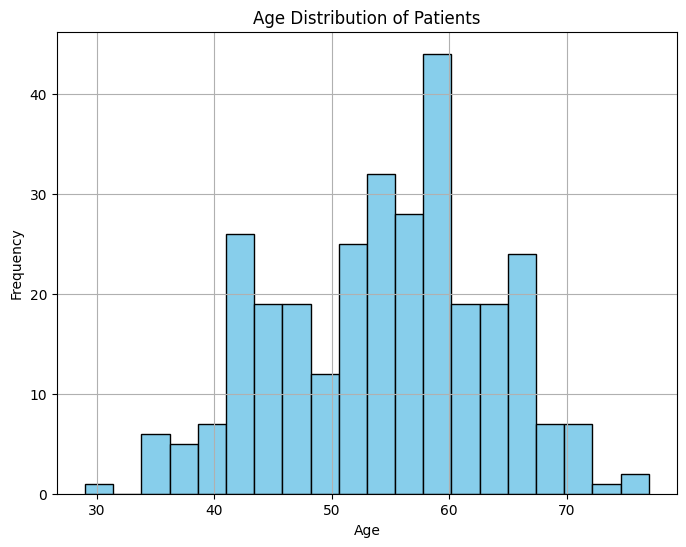

In [18]:
# Plot histogram of age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

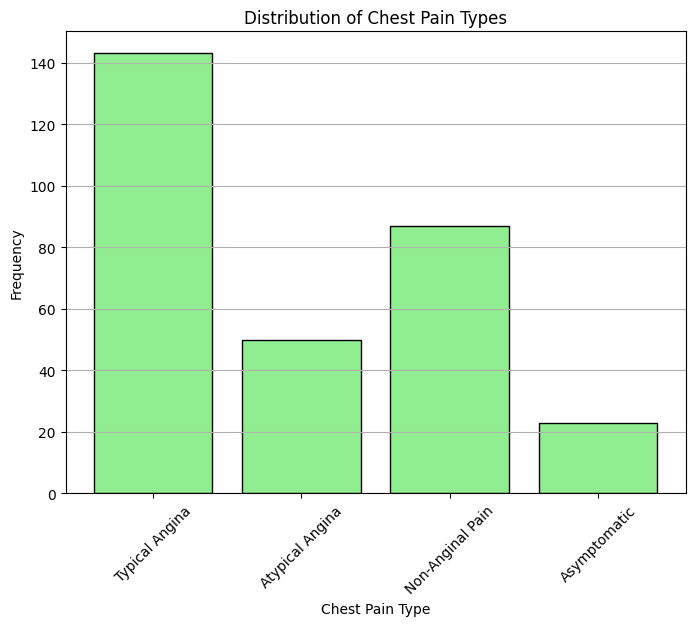

In [19]:
# Create bar chart for chest pain types distribution
plt.figure(figsize=(8, 6))
chest_pain_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
chest_pain_counts = df[['cp_0', 'cp_1', 'cp_2', 'cp_3']].sum()
plt.bar(chest_pain_labels, chest_pain_counts, color='lightgreen', edgecolor='black')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


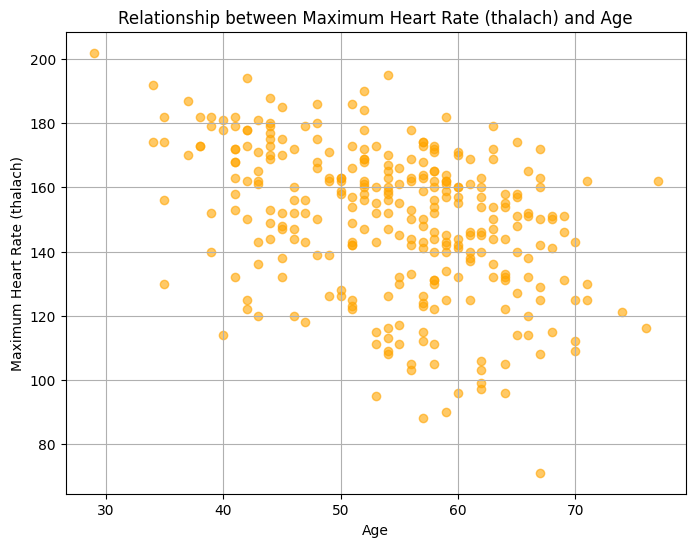

In [20]:
# Plot scatter plot for thalach vs age
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalach'], color='orange', alpha=0.6)
plt.title('Relationship between Maximum Heart Rate (thalach) and Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.grid(True)
plt.show()


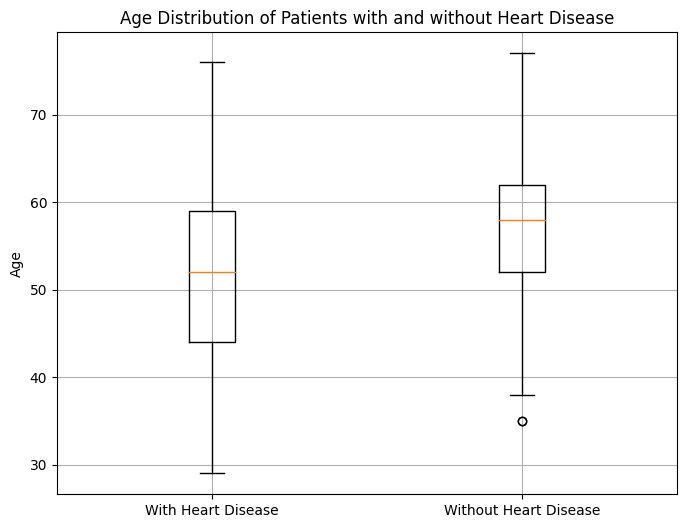

In [21]:
# Create box plot for age distribution with and without heart disease
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['target'] == 1]['age'], df[df['target'] == 0]['age']], labels=['With Heart Disease', 'Without Heart Disease'])
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.ylabel('Age')
plt.grid(True)
plt.show()


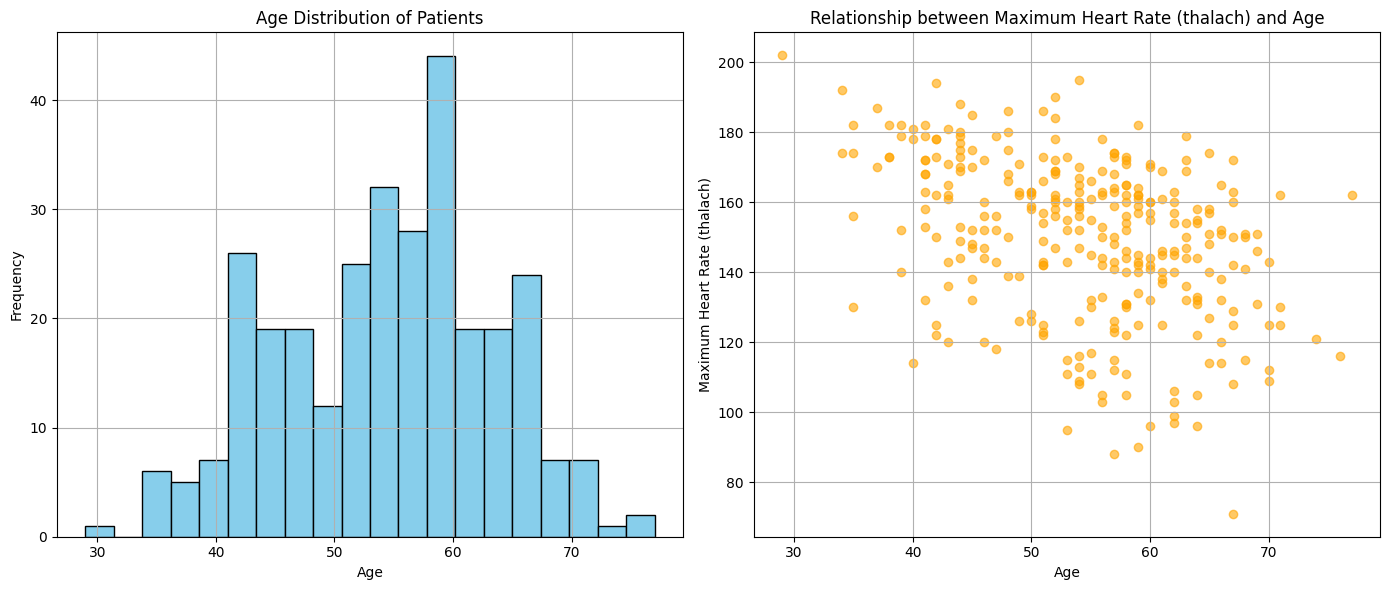

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Histogram of age distribution
axs[0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Age Distribution of Patients')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Subplot 2: Scatter plot of thalach vs age
axs[1].scatter(df['age'], df['thalach'], color='orange', alpha=0.6)
axs[1].set_title('Relationship between Maximum Heart Rate (thalach) and Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Maximum Heart Rate (thalach)')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()